In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

%matplotlib inline

In [2]:
train_df = pd.read_csv("./train_data.csv", index_col=["Id"])

In [3]:
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
print("Training data shape: {}".format(train_df.shape))

Training data shape: (1460, 80)


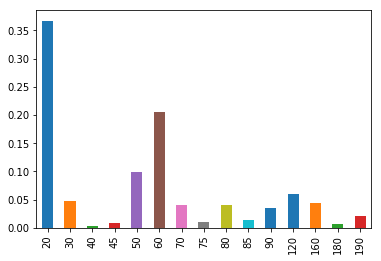

In [39]:
# This Plot tell us that more than 35% properties belong to class 20
plt.figure()
(train_df['MSSubClass'].value_counts() / len(train_df)).sort_index().plot.bar()
plt.show()

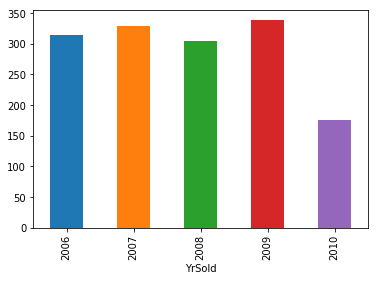

In [43]:
plt.figure()
train_df.groupby(by='YrSold')['YrSold'].count().plot.bar()
plt.show()

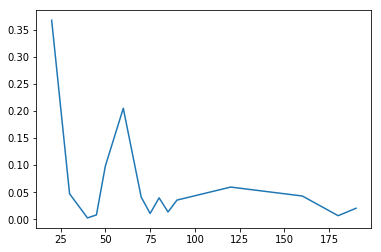

In [44]:
plt.figure()
(train_df['MSSubClass'].value_counts() / len(train_df)).sort_index().plot.line()
plt.show()

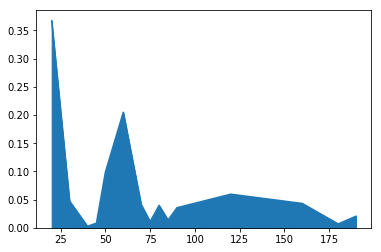

In [45]:
plt.figure()
(train_df['MSSubClass'].value_counts() / len(train_df)).sort_index().plot.area()
plt.show()

In [146]:
# Lets explore sale price first
train_df['SalePrice'].describe()

count    1460.000000
mean        0.910730
std         0.013364
min         0.853386
25%         0.902592
50%         0.910286
75%         0.919271
max         0.957525
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


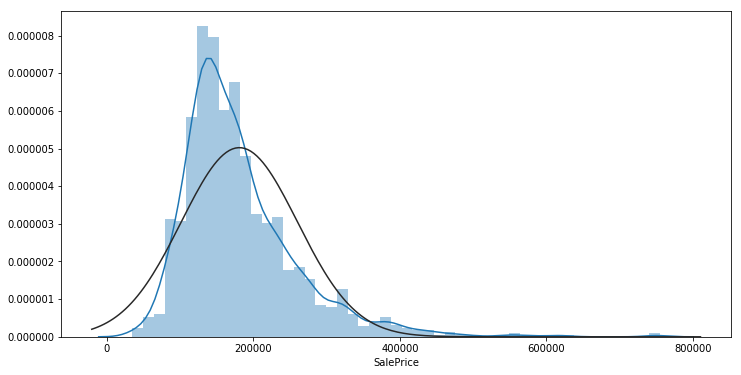

In [71]:
# let's analyze target variable 
# we can see that sale price is skewed to the right (positive skewness). 
# As linear models love normal distribution, we need to transform sale price to make it normally distributed.

fig = plt.figure(figsize=(12, 6))
res = sns.distplot(train_df['SalePrice'], fit=stats.norm)
plt.show()

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


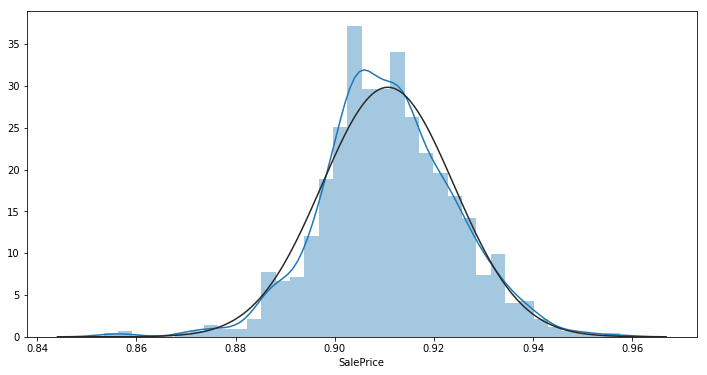

In [75]:
# log transform works really well in case of positive skewness.
# Sale price now looks well distributed after log transform.
train_df['SalePrice'] = np.log(train_df['SalePrice']) 

fig = plt.figure(figsize=(12, 6))
res = sns.distplot(train_df['SalePrice'], fit=stats.norm)
plt.show()

In [140]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = ((train_df.isnull().sum() / train_df.isnull().count()) * 100).sort_values(ascending=False)
 
data = np.array((total, percent))
missing_df = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_df.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [69]:
corr = train_df.corr()
corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[:20]


SalePrice     SalePrice       1.000000
GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
SalePrice     OverallQual     0.790982
GrLivArea     SalePrice       0.708624
              2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
GarageYrBlt   YearRemodAdd    0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
SalePrice     GarageArea      0.623431
TotRmsAbvGrd  2ndFlrSF        0.616423
TotalBsmtSF   SalePrice       0.613581
2ndFlrSF      HalfBath        0.609707
1stFlrSF      SalePrice       0.605852
GarageCars    OverallQual     0.600671
OverallQual   GrLivArea       0.593007
dtype: float64

In [72]:
train_df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

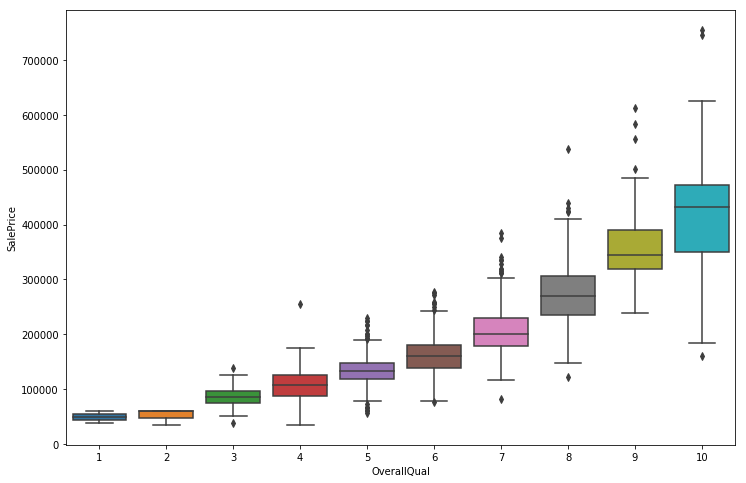

In [84]:
plt.figure(figsize=(12, 8))
sns.boxplot(train_df['OverallQual'], train_df['SalePrice'])
plt.show()

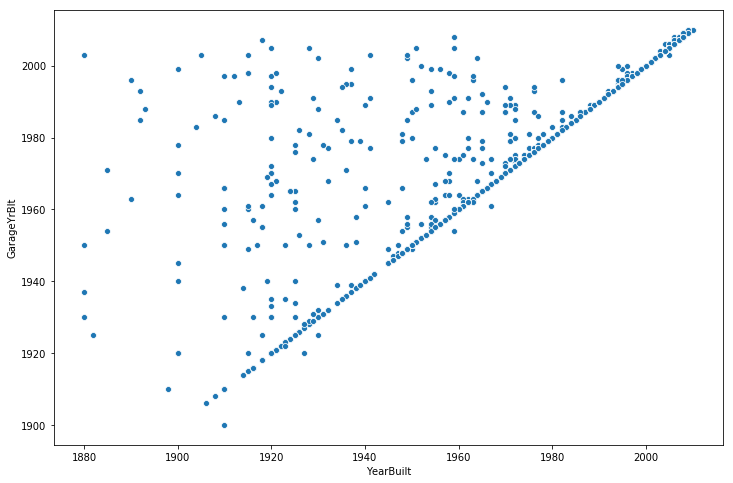

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(train_df['YearBuilt'], train_df['GarageYrBlt'])
plt.show()